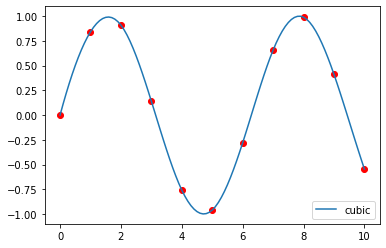

In [1]:
 #!/usr/bin/env python  
# -*-coding:utf-8 -*-  
import numpy as np  
from scipy import interpolate  
import pylab as pl  

x=np.linspace(0,10,11)  
#x=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]  
y=np.sin(x)  
xnew=np.linspace(0,10,101)  
pl.plot(x,y,"ro")  

for kind in ["cubic"]:#插值方式  
    #"nearest","zero"为阶梯插值  
    #slinear 线性插值  
    #"quadratic","cubic" 为2阶、3阶B样条曲线插值  
    f=interpolate.interp1d(x,y,kind=kind)  
    # ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)  
    ynew=f(xnew)  
    pl.plot(xnew,ynew,label=str(kind))  
pl.legend(loc="lower right")  
pl.show()  

/home/ouazusakou/anaconda3/envs/torch1.7.1/lib/python3.7/site-packages/stable_baselines3/common/buffers.py:220: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.17GB > 0.06GB
  "This system does not have apparently enough memory to store the complete "


Reward: -15
Reward: -12.0


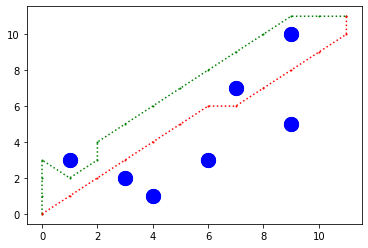

In [1]:
import gym
import highway_env
import numpy as np
import torch
from maze_new_env import Maze_New_Env
from stable_baselines3 import HerReplayBuffer, SAC, DDPG, TD3
from stable_baselines3.common.noise import NormalActionNoise
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy import interpolate
import pylab as pl

from scipy import interpolate
torch.backends.cudnn.enabled = False
env = Maze_New_Env(grid_size=12)


# Load saved model
# Because it needs access to `env.compute_reward()`
# HER must be loaded with the env
model = DDPG.load("ddpg_pendulum")
model1 = SAC.load("sac_pendulum")
obs = env.reset()


# Evaluate the agent
episode_reward = 0
x=[]
y=[]
x_=[]
y_=[]
x1=[]
y1=[]
coord=np.where(env.observation==1)
#print(coord)
amount=coord[0].size
#print(amount)
x__,y__=coord
for i in range(amount):
    x_.append(x__[i])
    y_.append(y__[i])
#print(x_)
#print(y_)

for _ in range(100000):
    x.append(env.agent_pos[0])
    y.append(env.agent_pos[1])
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    #print(obs)
    #env.render()



    episode_reward += reward
    if done:
        x.append(env.agent_pos[0])
        y.append(env.agent_pos[1])
        print("Reward:", episode_reward)
        episode_reward = 0.0
        coord = np.where(env.observation == 1)
        # print(coord)
        amount = coord[0].size
        # print(amount)
        x__, y__ = coord
        for i in range(amount):
            x_.append(x__[i])
            y_.append(y__[i])
        obs = env.reset()

        plt.scatter(x, y, color = "green", s = 1)
        plt.plot(x,y,color = "green",linestyle=':')
        plt.scatter(x_,y_,color = "blue", s =200)
       # plt.savefig('./test_' + str(time.time()) + '.png')
        #plt.show()
        
        break
obs = env.reset()
for _ in range(100000):
    x1.append(env.agent_pos[0])
    y1.append(env.agent_pos[1])
    action, _ = model1.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    # print(obs)
    # env.render()



    episode_reward += reward
    if done:
        x1.append(env.agent_pos[0])
        y1.append(env.agent_pos[1])
        print("Reward:", episode_reward)
        episode_reward = 0.0
        # print(coord)
        # print(amount)
        obs = env.reset()
        plt.scatter(x1, y1, color="red", s=1)
        plt.plot(x1, y1, color="red", linestyle=':')
        #plt.savefig('./test_' + str(time.time()) + '.png')
        #plt.show()

        break


In [2]:
x

[0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]

In [6]:
x1

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.0]

In [7]:
x_new=np.linspace(x[0],x[-1],101) 

In [8]:
print(x_new)

[ 0.    0.11  0.22  0.33  0.44  0.55  0.66  0.77  0.88  0.99  1.1   1.21
  1.32  1.43  1.54  1.65  1.76  1.87  1.98  2.09  2.2   2.31  2.42  2.53
  2.64  2.75  2.86  2.97  3.08  3.19  3.3   3.41  3.52  3.63  3.74  3.85
  3.96  4.07  4.18  4.29  4.4   4.51  4.62  4.73  4.84  4.95  5.06  5.17
  5.28  5.39  5.5   5.61  5.72  5.83  5.94  6.05  6.16  6.27  6.38  6.49
  6.6   6.71  6.82  6.93  7.04  7.15  7.26  7.37  7.48  7.59  7.7   7.81
  7.92  8.03  8.14  8.25  8.36  8.47  8.58  8.69  8.8   8.91  9.02  9.13
  9.24  9.35  9.46  9.57  9.68  9.79  9.9  10.01 10.12 10.23 10.34 10.45
 10.56 10.67 10.78 10.89 11.  ]


In [3]:
x_=np.unique(x)
print(x_)
print(x)
y_ = np.unique(y)
print(y)
print(y_)
f=interpolate.interp1d(x,y,kind='cubic')  

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
[1.0, 2.0, 3.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.0, 11.0]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


ValueError: Expect x to not have duplicates

In [7]:
change1 = np.linspace(0,1,4) 
print(change)

[0.         0.33333333 0.66666667 1.        ]


In [8]:
x_=x

In [9]:
x_[0:4]=change1

In [14]:
change2 = np.linspace(2,3,3) 
print(change2)

[2.  2.5 3. ]


In [15]:
x_[4:6]=change2

In [8]:
x


[0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0]

In [30]:
z1 = np.polyfit(x, y, 4)

In [31]:
p1 = np.poly1d(z1)

In [32]:
yvals=p1(x)

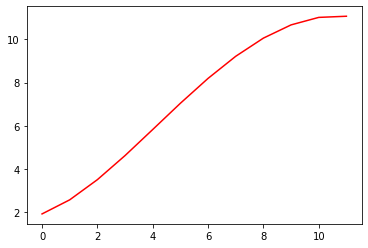

In [33]:
plot2=plt.plot(x, yvals, 'r',label='polyfit values')

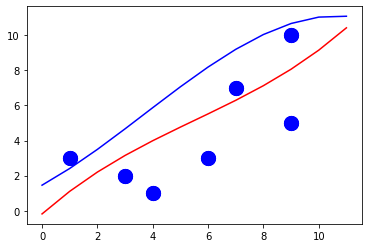

In [3]:

z2 = np.polyfit(x1, y1, 3)
p2 = np.poly1d(z2)
y2vals=p2(x1)
plot3=plt.plot(x1, y2vals, 'r',label='polyfit2values')
z1 = np.polyfit(x, y, 3)
p1 = np.poly1d(z1)
yvals=p1(x)
plot2=plt.plot(x, yvals, 'b',label='polyfit1values')
plt.scatter(x_,y_,color = "blue", s =200)

In [3]:
plt.show()
x1

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]

In [1]:
axes = plt.subplot(1,1,1)
axes.plot(x1,y2vals, color = 'blue', linewidth=2, linestyle="-")
axes.plot(x,yvals, color = 'red', linewidth=2, linestyle="-")
#axes.set_xlim(x.min(),x.max())
axes.set_ylim(min(y2vals.min(),yvales.min()),max(y2vals.max(),yvals.max()))
axes.scatter(x_,y_,color = "blue", s =200)

NameError: name 'plt' is not defined

In [4]:
def data_correct(x):
    X1=x.copy()
    X1[0:5]=np.linspace(X1[0],X1[5],5) 
    X1[-3:] = np.linspace(X1[-3],X1[-1],3)
    return X1

In [3]:
print(data_correct(x1))

NameError: name 'data_correct' is not defined

[0.0, 0.5, 1.0, 1.5, 2.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
[0.0, 1.25, 2.5, 3.75, 5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.5, 11.0]


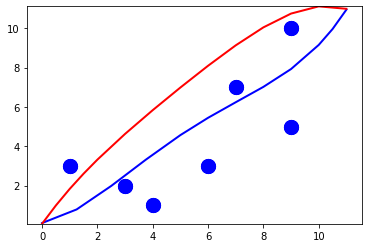

In [5]:
x=data_correct(x)
x1=data_correct(x1)
print(x)
print(x1)
z2 = np.polyfit(x1, y1, 4)
p2 = np.poly1d(z2)
y2vals=p2(x1)
#plot3=plt.plot(x1, y2vals, 'r',label='polyfit2values')
z1 = np.polyfit(x, y, 4)
p1 = np.poly1d(z1)
yvals=p1(x)
#plot2=plt.plot(x, yvals, 'b',label='polyfit1values')
#plt.scatter(x_,y_,color = "blue", s =200)

axes = plt.subplot(1,1,1)
axes.plot(x1,y2vals, color = 'blue', linewidth=2, linestyle="-")
axes.plot(x,yvals, color = 'red', linewidth=2, linestyle="-")
#axes.set_xlim(x.min(),x.max())
axes.set_ylim(min(y2vals.min(),yvals.min()),max(y2vals.max(),yvals.max()))
axes.scatter(x_,y_,color = "blue", s =200)


In [23]:
x1

[0.0,
 1.3333333333333333,
 2.6666666666666665,
 4.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 10.5,
 11.0]